In [53]:
import pandas as pd
import numpy as np

from pathlib import Path

DATA_DIR = Path("../data/interim")

LIVE_PATH   = DATA_DIR / "live_customer_product_state.parquet"
INTERVALS_PATH = DATA_DIR / "purchase_intervals.parquet"
RET_PATH    = DATA_DIR / "product_group_retention.parquet"
BENCH_PATH  = DATA_DIR / "retention_benchmarks.parquet"

print("Using DATA_DIR:", DATA_DIR.resolve())


Using DATA_DIR: /Users/stanislawzaranski/Desktop/361sales/data/interim


In [54]:
def read_parquet_if_exists(path: Path) -> pd.DataFrame | None:
    if path.exists():
        df = pd.read_parquet(path)
        print(f"Loaded {path.name}: {df.shape}")
        return df
    print(f"Missing: {path.name}")
    return None

live = read_parquet_if_exists(LIVE_PATH)
intervals = read_parquet_if_exists(INTERVALS_PATH)
ret = read_parquet_if_exists(RET_PATH)
bench = read_parquet_if_exists(BENCH_PATH)


Loaded live_customer_product_state.parquet: (606555, 13)
Loaded purchase_intervals.parquet: (70926, 7)
Loaded product_group_retention.parquet: (37, 10)
Loaded retention_benchmarks.parquet: (35, 4)


In [55]:
def peek_schema(df: pd.DataFrame, name: str, n=5):
    print("\n" + "="*80)
    print(name, "shape:", df.shape)
    print("Columns:", list(df.columns))
    display(df.head(n))

if live is not None:
    peek_schema(live, "live_customer_product_state")

if intervals is not None:
    peek_schema(intervals, "purchase_intervals")

if ret is not None:
    peek_schema(ret, "product_group_retention")

if bench is not None:
    peek_schema(bench, "retention_benchmarks")



live_customer_product_state shape: (606555, 13)
Columns: ['anon', 'MATRIX GRUPA PRODUKTOWA', 'last_purchase_date', 'last_matrix_name', 'days_since_last_purchase', 'due_date', 'days_to_due', 'status', 'filters_added_last_event', 'bottles_owned', 'bottles_owned_effective', 'coverage_days_est', 'actionable_status']


,anon,MATRIX GRUPA PRODUKTOWA,last_purchase_date,last_matrix_name,days_since_last_purchase,due_date,days_to_due,status,filters_added_last_event,bottles_owned,bottles_owned_effective,coverage_days_est,actionable_status
0,ANON_0000001,03_butelki filtrujące SOLID,2022-09-11,"SOLID 0,7 1F",1187,NaT,NaN,None,NaN,NaN,NaN,NaN,recency_only
1,ANON_0000001,06_filtry do butelek Soft i Solid,2022-09-11,1 FILTR BUTELKOWY,1187,2023-02-06 16:00:00.000000002,-1039.0,overdue,4.0,1.0,1.0,148.666667,overdue
2,ANON_0000001,07_akcesoria do Soft/Solid,2022-09-11,"RURKA TRITANOWA DO SOLID 0,7",1187,NaT,NaN,None,NaN,NaN,NaN,NaN,recency_only
3,ANON_0000002,02_butelki filtrujące SOFT,2022-09-11,"SOFT 0,5 1F",1187,NaT,NaN,None,NaN,NaN,NaN,NaN,recency_only
4,ANON_0000003,26_podgrzewacze przepływowe,2022-09-11,PRZEPŁYWOWY PODGRZEWACZ - NADUMYLAWKOWY,1187,NaT,NaN,None,NaN,NaN,NaN,NaN,recency_only



purchase_intervals shape: (70926, 7)
Columns: ['anon', 'MATRIX GRUPA PRODUKTOWA', 'date', 'prev_date', 'delta_days', 'prev_qty', 'adj_retention_days']


,anon,MATRIX GRUPA PRODUKTOWA,date,prev_date,delta_days,prev_qty,adj_retention_days
0,ANON_0000019,02_butelki filtrujące SOFT,2024-04-29,2022-10-11,566.0,1.0,566.000000
1,ANON_0000019,06_filtry do butelek Soft i Solid,2023-06-20,2022-10-11,252.0,2.0,126.000000
2,ANON_0000019,06_filtry do butelek Soft i Solid,2024-04-29,2023-06-20,314.0,13.0,24.153846
3,ANON_0000019,06_filtry do butelek Soft i Solid,2025-04-06,2024-04-29,342.0,12.0,28.500000
4,ANON_0000027,13_filtry do dzbanków standard,2024-11-17,2023-06-07,529.0,16.0,33.062500



product_group_retention shape: (37, 10)
Columns: ['MATRIX GRUPA PRODUKTOWA', 'customers', 'repeat_customers', 'repeat_rate', 'avg_retention_days', 'median_retention_days', 'n_intervals', 'avg_adj_retention_days', 'median_adj_retention_days', 'n_intervals_adj']


,MATRIX GRUPA PRODUKTOWA,customers,repeat_customers,repeat_rate,avg_retention_days,median_retention_days,n_intervals,avg_adj_retention_days,median_adj_retention_days,n_intervals_adj
0,32_nabój CO2 - wymiana,2508,842,0.335726,76.698258,54.0,1952.0,72.497222,50.0,1952.0
1,21_wkład D1 do Flow Comfort,3031,720,0.237545,185.556184,126.0,1237.0,160.981541,102.0,1237.0
2,24_Filtry przepływowe - wkłady,7391,1599,0.216344,254.430990,212.0,2717.0,84.528491,49.0,2717.0
3,22_wkład DC10 do Flow Comfort,1744,297,0.170298,219.667447,184.0,427.0,202.739071,182.0,427.0
4,27_Proskin - urządzenia i filtry,435,68,0.156322,134.592593,101.0,81.0,108.435802,72.0,81.0



retention_benchmarks shape: (35, 4)
Columns: ['MATRIX GRUPA PRODUKTOWA', 'p25', 'median', 'p75']


,MATRIX GRUPA PRODUKTOWA,p25,median,p75
0,01_bidony,23.5,68.500,147.000
1,02_butelki filtrujące SOFT,30.5,88.875,208.625
2,03_butelki filtrujące SOLID,54.0,142.500,282.000
3,04_termiczna butelka filtrująca SOLID,30.5,102.000,244.500
4,05_butelki i kubki termiczne,42.5,138.000,274.500


# Notebook 07 — Backend for Retention Dashboard (Product-group view)

At this point we successfully loaded:

- **live_customer_product_state** (`live`): one row per customer × product group, with:
  - `days_since_last_purchase` for all groups
  - and for some groups (e.g. bottle filters) due signals: `due_date`, `days_to_due`, `status`

- **purchase_intervals** (`intervals`): one row per customer interval (repeat purchase), with:
  - raw gap `delta_days`
  - quantity at previous purchase `prev_qty`
  - adjusted retention cycle `adj_retention_days` (our histogram source)

- **product_group_retention** (`ret`): aggregated metrics per product group
- **retention_benchmarks** (`bench`): p25 / median / p75 per product group

Next we will:
1. Standardize product-group column naming across tables.
2. Clean the interval table to keep only reasonable retention cycles.
3. Build a simple function: “give me all stats + distribution for one product group”.


In [56]:
# We'll standardize the product group column name across all tables
KEY_GROUP = "product_group"

def standardize_group_col(df: pd.DataFrame, group_col: str = "MATRIX GRUPA PRODUKTOWA") -> pd.DataFrame:
    """
    Returns a copy where the product-group column is renamed to KEY_GROUP.
    This avoids repeating 'MATRIX GRUPA PRODUKTOWA' all over the dashboard code.
    """
    out = df.copy()
    if group_col in out.columns:
        out = out.rename(columns={group_col: KEY_GROUP})
    return out

live_std = standardize_group_col(live) if live is not None else None
intervals_std = standardize_group_col(intervals) if intervals is not None else None
ret_std = standardize_group_col(ret) if ret is not None else None
bench_std = standardize_group_col(bench) if bench is not None else None

print("live_std:", None if live_std is None else live_std.shape)
print("intervals_std:", None if intervals_std is None else intervals_std.shape)
print("ret_std:", None if ret_std is None else ret_std.shape)
print("bench_std:", None if bench_std is None else bench_std.shape)


live_std: (606555, 13)
intervals_std: (70926, 7)
ret_std: (37, 10)
bench_std: (35, 4)


## Step: Parse dates and numeric columns

Pandas sometimes reads dates as strings and numeric columns as objects.
For retention analysis we need:

- dates as `datetime`
- retention cycle columns as numeric (`float`)


In [57]:
def ensure_datetime(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    out = df.copy()
    for c in cols:
        if c in out.columns:
            out[c] = pd.to_datetime(out[c], errors="coerce")
    return out

def ensure_numeric(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    out = df.copy()
    for c in cols:
        if c in out.columns:
            out[c] = pd.to_numeric(out[c], errors="coerce")
    return out

# live dates + numeric
if live_std is not None:
    live_std = ensure_datetime(live_std, ["last_purchase_date", "due_date"])
    live_std = ensure_numeric(live_std, ["days_since_last_purchase", "days_to_due"])

# intervals dates + numeric
if intervals_std is not None:
    intervals_std = ensure_datetime(intervals_std, ["date", "prev_date"])
    intervals_std = ensure_numeric(intervals_std, ["delta_days", "prev_qty", "adj_retention_days"])

# bench numeric
if bench_std is not None:
    bench_std = ensure_numeric(bench_std, ["p25", "median", "p75"])

print("Done parsing. Sample intervals dtypes:")
display(intervals_std.dtypes if intervals_std is not None else "intervals_std is None")


Done parsing. Sample intervals dtypes:


anon                          object
product_group                 object
date                  datetime64[ns]
prev_date             datetime64[ns]
delta_days                   float64
prev_qty                     float64
adj_retention_days           float64
dtype: object

In [58]:
if intervals_std is None:
    intervals_clean = None
else:
    intervals_clean = intervals_std.dropna(subset=["anon", KEY_GROUP, "adj_retention_days"]).copy()

    # Keep reasonable values
    intervals_clean = intervals_clean[
        (intervals_clean["adj_retention_days"] > 0) &
        (intervals_clean["adj_retention_days"] < 3650)   # 10-year cap
    ].copy()

    print("intervals_clean:", intervals_clean.shape)
    display(intervals_clean.head())


intervals_clean: (70926, 7)


,anon,product_group,date,prev_date,delta_days,prev_qty,adj_retention_days
0,ANON_0000019,02_butelki filtrujące SOFT,2024-04-29,2022-10-11,566.0,1.0,566.000000
1,ANON_0000019,06_filtry do butelek Soft i Solid,2023-06-20,2022-10-11,252.0,2.0,126.000000
2,ANON_0000019,06_filtry do butelek Soft i Solid,2024-04-29,2023-06-20,314.0,13.0,24.153846
3,ANON_0000019,06_filtry do butelek Soft i Solid,2025-04-06,2024-04-29,342.0,12.0,28.500000
4,ANON_0000027,13_filtry do dzbanków standard,2024-11-17,2023-06-07,529.0,16.0,33.062500


# Retention vs Live State (IMPORTANT)

We maintain **two separate layers**:

## 1) Retention layer (repeat purchases only)
Goal: estimate "typical replacement cycles" and plot retention distributions.

- Uses `purchase_intervals.parquet`
- Only customers with **≥2 purchases** appear here (an interval exists only then)
- This layer powers:
  - histograms of `adj_retention_days`
  - median / p25 / p75 retention benchmarks

## 2) Live state layer (all customers)
Goal: operational snapshot ("who is overdue / due soon / ok", and recency for all products).

- Uses `live_customer_product_state.parquet`
- Includes **one-time buyers**
- This layer powers:
  - overdue / due soon counts for filter groups (where due logic exists)
  - days since last purchase for all groups


In [59]:
# -----------------------------------------------------------------------------
# RETENTION LAYER (repeat-only)
# -----------------------------------------------------------------------------
# intervals_clean is already repeat-only by construction (needs prev_date + date),
# but we'll enforce validity + create a clear "retention_days" field for dashboard use.

if intervals_clean is None:
    raise ValueError("intervals_clean is None. Make sure you ran the intervals cleaning cell.")

retention_intervals = intervals_clean.copy()

# Standardize the metric name used across the dashboard
retention_intervals["retention_days"] = retention_intervals["adj_retention_days"]

# Extra safety filters (optional but good)
retention_intervals = retention_intervals.dropna(subset=["anon", KEY_GROUP, "retention_days"])
retention_intervals = retention_intervals[
    (retention_intervals["retention_days"] > 0) &
    (retention_intervals["retention_days"] < 3650)
].copy()

print("Retention intervals (repeat-only):", retention_intervals.shape)
display(retention_intervals.head())

# -----------------------------------------------------------------------------
# Diagnostics: repeat coverage per group
# -----------------------------------------------------------------------------
# For each product group:
# - total customers in live layer
# - customers who have at least one interval (i.e., repeat purchasers)
# - repeat coverage = repeat_customers / total_customers

if live_std is None:
    raise ValueError("live_std is None. Make sure you standardized live first.")

total_customers_by_group = (
    live_std.groupby(KEY_GROUP)["anon"]
    .nunique()
    .rename("customers_total")
    .reset_index()
)

repeat_customers_by_group = (
    retention_intervals.groupby(KEY_GROUP)["anon"]
    .nunique()
    .rename("customers_repeat")
    .reset_index()
)

repeat_coverage = total_customers_by_group.merge(
    repeat_customers_by_group, on=KEY_GROUP, how="left"
)

repeat_coverage["customers_repeat"] = repeat_coverage["customers_repeat"].fillna(0).astype(int)
repeat_coverage["repeat_coverage"] = (
    repeat_coverage["customers_repeat"] / repeat_coverage["customers_total"]
)

repeat_coverage = repeat_coverage.sort_values("repeat_coverage", ascending=False).reset_index(drop=True)

print("Repeat coverage table (top 10):")
display(repeat_coverage.head(10))


Retention intervals (repeat-only): (70926, 8)


,anon,product_group,date,prev_date,delta_days,prev_qty,adj_retention_days,retention_days
0,ANON_0000019,02_butelki filtrujące SOFT,2024-04-29,2022-10-11,566.0,1.0,566.000000,566.000000
1,ANON_0000019,06_filtry do butelek Soft i Solid,2023-06-20,2022-10-11,252.0,2.0,126.000000,126.000000
2,ANON_0000019,06_filtry do butelek Soft i Solid,2024-04-29,2023-06-20,314.0,13.0,24.153846,24.153846
3,ANON_0000019,06_filtry do butelek Soft i Solid,2025-04-06,2024-04-29,342.0,12.0,28.500000,28.500000
4,ANON_0000027,13_filtry do dzbanków standard,2024-11-17,2023-06-07,529.0,16.0,33.062500,33.062500


Repeat coverage table (top 10):


,product_group,customers_total,customers_repeat,repeat_coverage
0,32_nabój CO2 - wymiana,2508,842,0.335726
1,21_wkład D1 do Flow Comfort,3031,720,0.237545
2,24_Filtry przepływowe - wkłady,7391,1599,0.216344
3,22_wkład DC10 do Flow Comfort,1744,297,0.170298
4,27_Proskin - urządzenia i filtry,435,68,0.156322
5,16_filtry do dzbanków AGD+,14722,2261,0.153580
6,06_filtry do butelek Soft i Solid,119602,15595,0.130391
7,14_filtry do dzbanków Mg+,11272,1468,0.130234
8,15_filtry do dzbanków Ph+,1568,180,0.114796
9,07_akcesoria do Soft/Solid,34822,3696,0.106140


## Retention histogram (repeat-only) with key stats

This plot shows the distribution of **adjusted retention cycles** (`retention_days`) for a chosen product group.

Important:
- The histogram uses **repeat purchases only** (customers with ≥2 purchases).
- The header shows:
  - total customers (from live layer)
  - repeat customers (from intervals layer)
  - repeat coverage rate
  - median retention (repeat-only)


In [60]:
import matplotlib.pyplot as plt

def plot_retention_histogram(
    product_group: str,
    retention_intervals: pd.DataFrame,
    repeat_coverage: pd.DataFrame,
    bins: int = 50,
    max_days: int | None = None,
):
    """
    Plot a histogram of retention_days for one product group.
    Adds a readable stats header + median line.
    """
    # --- 1) Pull repeat-only retention series ---
    g = retention_intervals[retention_intervals[KEY_GROUP] == product_group].copy()
    s = g["retention_days"].dropna()

    if len(s) == 0:
        print(f"No retention intervals found for: {product_group}")
        return

    # optionally cap for readability (without changing stored data)
    if max_days is not None:
        s_plot = s[s <= max_days]
    else:
        s_plot = s

    # --- 2) Get coverage stats (from live + intervals) ---
    row = repeat_coverage[repeat_coverage[KEY_GROUP] == product_group]
    if len(row) == 0:
        customers_total = np.nan
        customers_repeat = int(g["anon"].nunique())
        repeat_cov = np.nan
    else:
        customers_total = int(row["customers_total"].iloc[0])
        customers_repeat = int(row["customers_repeat"].iloc[0])
        repeat_cov = float(row["repeat_coverage"].iloc[0])

    median_ret = float(s.median())  # median on full repeat-only series (not capped)

    # --- 3) Plot ---
    plt.figure(figsize=(10, 5))
    plt.hist(s_plot, bins=bins)

    # median line (still shown even if max_days < median, that's OK)
    plt.axvline(median_ret, color="red")

    # --- 4) Clean, readable title (stats header) ---
    stats_line = (
        f"Total customers: {customers_total:,} | "
        f"Repeat customers: {customers_repeat:,} | "
        f"Repeat coverage: {repeat_cov:.1%} | "
        f"Median retention: {median_ret:.1f} days"
    )

    title_main = f"Retention cycle distribution — {product_group}"
    plt.title(title_main + "\n" + stats_line)

    plt.xlabel("Adjusted retention cycle (days)")
    plt.ylabel("Number of intervals (repeat purchases)")
    plt.tight_layout()
    plt.show()


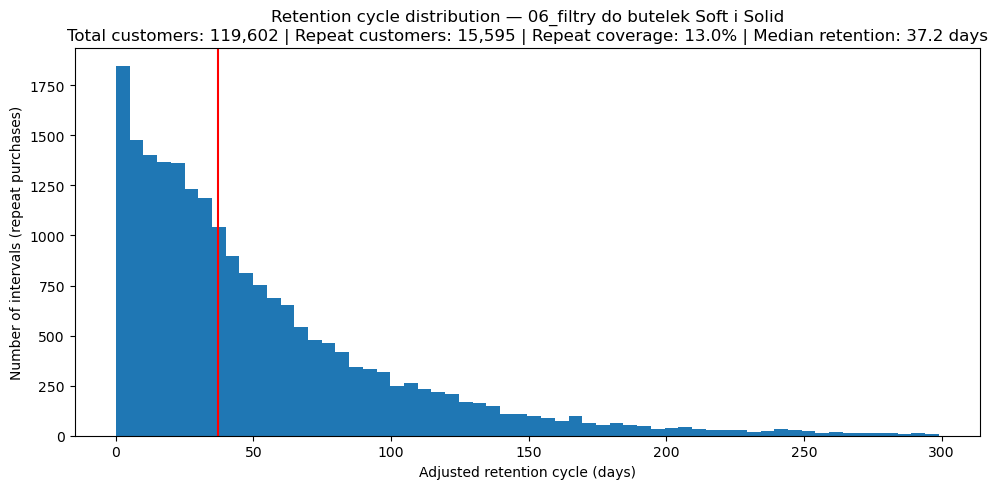

In [61]:
plot_retention_histogram(
    product_group="06_filtry do butelek Soft i Solid",
    retention_intervals=retention_intervals,
    repeat_coverage=repeat_coverage,
    bins=60,
    max_days=300  # optional; remove or change if you want full range
)


## Live status chart (operational view)

This chart shows the **current operational status** of customers for a selected product group.

Key points:
- Uses the **live customer–product state table**
- Includes **all customers** (one-time buyers included)
- Status is defined as:
  - **overdue**: `days_to_due < 0`
  - **due soon**: `0 ≤ days_to_due ≤ due_soon_days`
  - **ok**: `days_to_due > due_soon_days`
- For product groups without due logic, status will be `"recency_only"`


## As-of date control

Live status can be computed relative to:
- **"dataset"** – last available date in the dataset (reproducible)
- **"today"** – current calendar date (operational view)

This affects:
- `days_to_due`
- `status_live`

## User-controlled replacement benchmark

Live "due" status for filters depends on an assumed **days-per-unit** replacement cycle.
We allow two modes:

1) Use historical benchmarks:
- choose `p25`, `median`, or `p75`

2) Manual override:
- provide `manual_days_per_unit` (e.g. 45)

This lets us explore different replacement recommendations without changing the data pipeline.


## Live status helpers (ASOF date + benchmark control)

We support two controls:

### 1) ASOF date (what "today" means for the status)
- `asof="dataset"` → use the latest purchase date available in the dataset (reproducible)
- `asof="today"` → use today's date (operational dashboard mode)

### 2) Benchmark for due-date estimation (filters)
- `benchmark_source="bench"` → use historical benchmark from `retention_benchmarks` (default: `median`)
- `benchmark_source="manual"` → user provides `manual_days_per_unit` (e.g., 45)

Non-consumables or groups without due-input columns fall back to `recency_only`.



In [62]:
# ============================================================
# Live dashboard backend — column mappings (robust)
# ============================================================

KEY_CUST = "anon"

# live_customer_product_state.parquet
LIVE_GROUP_COL = "product_group"
LIVE_DATE_COL  = "last_purchase_date"

# retention_benchmarks.parquet
BENCH_GROUP_COL = "MATRIX GRUPA PRODUKTOWA"

# repeat_coverage table we built from intervals/retention tables
REPEAT_GROUP_COL = "product_group"


In [63]:
# ============================================================
# ASOF date selector
# ============================================================

def resolve_asof_date(live_df: pd.DataFrame, asof: str = "dataset") -> pd.Timestamp:
    """
    Resolve the ASOF_DATE used for live status computation.

    Parameters
    ----------
    asof : {"dataset", "today"}
        - "dataset": use the latest last_purchase_date present in the dataset
        - "today"  : use today's date (local machine time)
    """
    if asof == "dataset":
        return pd.to_datetime(live_df[LIVE_DATE_COL]).max().normalize()
    elif asof == "today":
        return pd.Timestamp.today().normalize()
    else:
        raise ValueError("asof must be 'dataset' or 'today'")


In [64]:
# ============================================================
# Benchmark selector (days-per-unit)
# ============================================================

def get_days_per_unit(
    product_group: str,
    bench_df: pd.DataFrame,
    source: str = "bench",                # "bench" | "manual"
    quantile: str = "median",             # "p25" | "median" | "p75" (only if source="bench")
    manual_days_per_unit: float | None = None,  # only if source="manual"
) -> float:
    """
    Returns the days-per-unit benchmark to use for due-date estimation.
    """
    if source == "manual":
        if manual_days_per_unit is None:
            raise ValueError("manual_days_per_unit must be provided when source='manual'")
        return float(manual_days_per_unit)

    # source == "bench"
    if quantile not in {"p25", "median", "p75"}:
        raise ValueError("quantile must be one of: 'p25', 'median', 'p75'")

    row = bench_df.loc[bench_df[BENCH_GROUP_COL] == product_group]
    if row.empty:
        raise ValueError(f"No benchmark found for product_group={product_group}")

    return float(row[quantile].iloc[0])


In [65]:
# ============================================================
# Compute live status for a single product group
# ============================================================

def compute_live_status_with_benchmark(
    live_df: pd.DataFrame,
    product_group: str,
    bench_df: pd.DataFrame,
    due_soon_days: int = 14,
    asof: str = "dataset",
    benchmark_source: str = "bench",   # "bench" | "manual"
    bench_quantile: str = "median",    # "p25" | "median" | "p75"
    manual_days_per_unit: float | None = None,
):
    """
    Returns:
      g      : filtered live_df for one product_group with recomputed due columns (when possible)
      counts : status counts (customers)
      meta   : dict with asof_date + benchmark settings
    """
    ASOF_DATE = resolve_asof_date(live_df, asof)

    g = live_df.loc[live_df[LIVE_GROUP_COL] == product_group].copy()
    if g.empty:
        raise ValueError(f"No rows found in live_df for product_group={product_group}")

    # We can recompute due logic only if required inputs exist and are populated
    required = {"filters_added_last_event", "bottles_owned_effective", LIVE_DATE_COL}
    has_due_inputs = required.issubset(g.columns) and g["filters_added_last_event"].notna().any()

    if has_due_inputs:
        days_per_unit = get_days_per_unit(
            product_group=product_group,
            bench_df=bench_df,
            source=benchmark_source,
            quantile=bench_quantile,
            manual_days_per_unit=manual_days_per_unit,
        )

        # clean numeric inputs
        g["bottles_owned_effective"] = pd.to_numeric(g["bottles_owned_effective"], errors="coerce").fillna(1).clip(lower=1)
        g["filters_added_last_event"] = pd.to_numeric(g["filters_added_last_event"], errors="coerce").fillna(0)
        g[LIVE_DATE_COL] = pd.to_datetime(g[LIVE_DATE_COL], errors="coerce")

        # recompute
        g["coverage_days_est_model"] = days_per_unit * (g["filters_added_last_event"] / g["bottles_owned_effective"])
        g["due_date_model"] = g[LIVE_DATE_COL] + pd.to_timedelta(g["coverage_days_est_model"], unit="D")
        g["days_to_due_asof"] = (g["due_date_model"] - ASOF_DATE).dt.days

        g["status_live"] = np.select(
            [
                g["days_to_due_asof"] < 0,
                (g["days_to_due_asof"] >= 0) & (g["days_to_due_asof"] <= due_soon_days),
            ],
            ["overdue", f"due_soon_{due_soon_days}d"],
            default="ok",
        )
    else:
        # No due logic available => recency-only
        g["status_live"] = "recency_only"

    counts = (
        g.groupby("status_live")[KEY_CUST]
        .nunique()
        .rename("customers")
        .reset_index()
        .rename(columns={"status_live": "status"})
    )

    meta = {
        "ASOF_DATE": ASOF_DATE,
        "has_due_inputs": bool(has_due_inputs),
        "benchmark_source": benchmark_source,
        "bench_quantile": bench_quantile if benchmark_source == "bench" else None,
        "manual_days_per_unit": manual_days_per_unit if benchmark_source == "manual" else None,
        "due_soon_days": due_soon_days,
    }

    return g, counts, meta


In [66]:
def plot_live_status_chart(
    product_group: str,
    live_df: pd.DataFrame,
    bench_df: pd.DataFrame,
    repeat_coverage: pd.DataFrame,
    due_soon_days: int = 14,
    asof: str = "dataset",
    benchmark_source: str = "bench",     # "bench" | "manual"
    bench_quantile: str = "median",      # "p25" | "median" | "p75"
    manual_days_per_unit: float | None = None,
):
    g, counts, meta = compute_live_status_with_benchmark(
        live_df=live_df,
        product_group=product_group,
        bench_df=bench_df,
        due_soon_days=due_soon_days,
        asof=asof,
        benchmark_source=benchmark_source,
        bench_quantile=bench_quantile,
        manual_days_per_unit=manual_days_per_unit,
    )

    # order bars nicely
    desired_order = ["overdue", f"due_soon_{due_soon_days}d", "ok", "recency_only"]
    counts["order"] = counts["status"].apply(
        lambda s: desired_order.index(s) if s in desired_order else len(desired_order)
    )
    counts = counts.sort_values("order")

    total_customers = g[KEY_CUST].nunique()

    # repeat coverage
    rc_row = repeat_coverage.loc[repeat_coverage[REPEAT_GROUP_COL] == product_group]
    repeat_cov = float(rc_row["repeat_coverage"].iloc[0]) if len(rc_row) else np.nan

    # benchmark label
    if benchmark_source == "bench":
        bench_label = f"Benchmark: {bench_quantile}"
    else:
        bench_label = f"Benchmark: manual={manual_days_per_unit:g}d"

    # =====================
    # Plot
    # =====================
    plt.figure(figsize=(8, 4))
    bars = plt.bar(counts["status"], counts["customers"])

    plt.xticks(rotation=20, ha="right")
    plt.xlabel("Status")
    plt.ylabel("Unique customers")

    title_main = f"Live status — {product_group}"
    title_sub = (
        f"As of: {meta['ASOF_DATE'].date()} ({asof}) | "
        f"{bench_label} | "
        f"Total customers: {total_customers:,} | "
        f"Repeat coverage: {repeat_cov:.1%}"
    )
    plt.title(title_main + "\n" + title_sub)

    # =====================
    # NEW: percentage labels on bars
    # =====================
    for bar, count in zip(bars, counts["customers"]):
        pct = count / total_customers * 100
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{pct:.1f}%",
            ha="center",
            va="bottom",
            fontsize=8,
            color="red"
        )

    plt.tight_layout()
    plt.show()


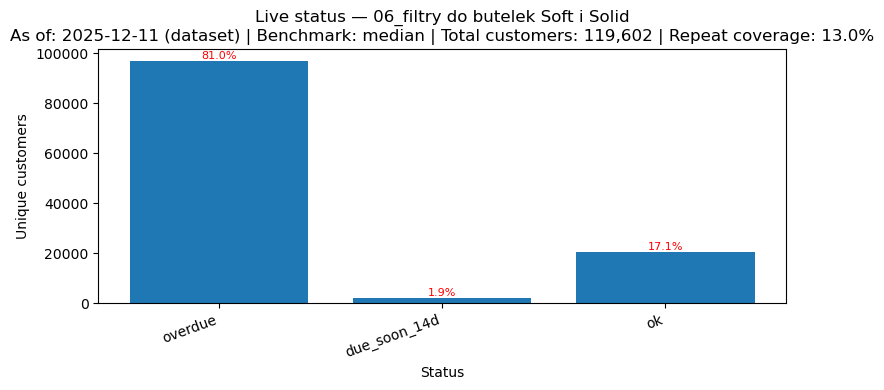

In [67]:
plot_live_status_chart(
    product_group="06_filtry do butelek Soft i Solid",
    live_df=live_std,
    bench_df=bench,
    repeat_coverage=repeat_coverage,
    due_soon_days=14,
    asof="dataset",                 # or "today"
    benchmark_source="bench",       # or "manual"
    bench_quantile="median",        # p25/median/p75
    manual_days_per_unit=None
)


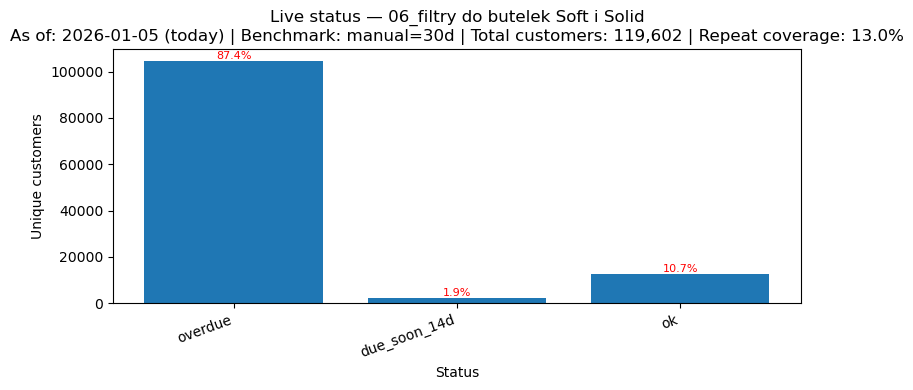

In [68]:
plot_live_status_chart(
    product_group="06_filtry do butelek Soft i Solid",
    live_df=live_std,
    bench_df=bench,
    repeat_coverage=repeat_coverage,
    due_soon_days=14,
    asof="today",                 # or "today"
    benchmark_source="manual",       # or "manual"
    bench_quantile="median",        # p25/median/p75
    manual_days_per_unit=30
)
